In [1]:
import numpy as np
# Movie ratings matrix (5 viewers, 3 movies)
movie_ratings = np.array([
    [5, 1, 4],
    [4, 4, 2],
    [4, 3, 5],
    [1, 1, 5],
    [3, 2, 1]
])

In [2]:
# 1. Average Rating Calculation: Compute the average rating for each movie.
average_responses = np.mean(movie_ratings, axis=0)
average_responses

array([3.4, 2.2, 3.4])

In [5]:
# 2. Viewer Preference Analysis: Determine which movie each viewer rated the highest.
highest_rating_viewier = np.max(movie_ratings, axis=1)
highest_rated_movie_by_viewer = []
highest_rating_viewier

array([5, 4, 5, 5, 3])

In [8]:
for i,viewer_ratings in enumerate(movie_ratings):
    highest_rating = highest_rating_viewier[i]
    highest_movie_index = np.where(viewer_ratings==highest_rating)[0][0]
    highest_rated_movie_by_viewer.append(highest_movie_index+1)
print("Highest:", highest_rated_movie_by_viewer) #wrong

Highest: [1, 1, 3, 3, 1, 1, 1, 3, 3, 1]


Exercises On Time Series Data In NumPy

1. Data Creation Exercise:

Objective: Create a simulated time series dataset.

Instructions:

Generate a date range from January 1, 2022, to December 31, 2022, with a daily frequency.
Simulate daily temperature data for this period. Assume temperature varies between 10°C and 35°C.
Simulate daily humidity data for the same period. Assume humidity varies between 30% and 90%.
Structure the data into a DataFrame with columns: Date, Temperature, and Humidity.

In [35]:
import pandas as pd
# Creating date ranges
dates = np.arange('2022-01', '2023-01', dtype='datetime64[D]')
temperature_data = np.random.uniform(low=10, high=35, size=len(dates)).astype(int)
humidity_data = np.random.uniform(low=30, high=90, size=len(dates)).astype(int)
weather_df = pd.DataFrame({
    'Date': dates,
    'Temperature': temperature_data,
    'Humidity': humidity_data
})
weather_df

,Date,Temperature,Humidity
0,2022-01-01,15,89
1,2022-01-02,18,65
2,2022-01-03,34,70
3,2022-01-04,33,61
4,2022-01-05,23,86
...,...,...,...
360,2022-12-27,17,86
361,2022-12-28,19,76
362,2022-12-29,27,56
363,2022-12-30,25,48


2. Data Analysis Exercise:

Objective: Perform basic data analysis on the time series data.

Instructions:

Calculate the mean, median, and standard deviation for both temperature and humidity.
Identify the date with the highest temperature and the date with the highest humidity.
[bonus] Plot the temperature and humidity trends over the year.

In [36]:
temp_mean = np.mean(weather_df['Temperature'], axis=0)
temp_median = np.median(weather_df['Temperature'], axis=0)
temp_std = np.std(weather_df['Temperature'], axis=0)
temp_mean, temp_median,temp_std

(21.904109589041095, 21.0, 7.493128146018043)

In [37]:
highest_temperature_date = weather_df.loc[weather_df['Temperature'].idxmax(), 'Date']

highest_humidity_date = weather_df.loc[weather_df['Humidity'].idxmax(), 'Date']

highest_temperature_date,highest_humidity_date

(Timestamp('2022-01-03 00:00:00'), Timestamp('2022-01-01 00:00:00'))

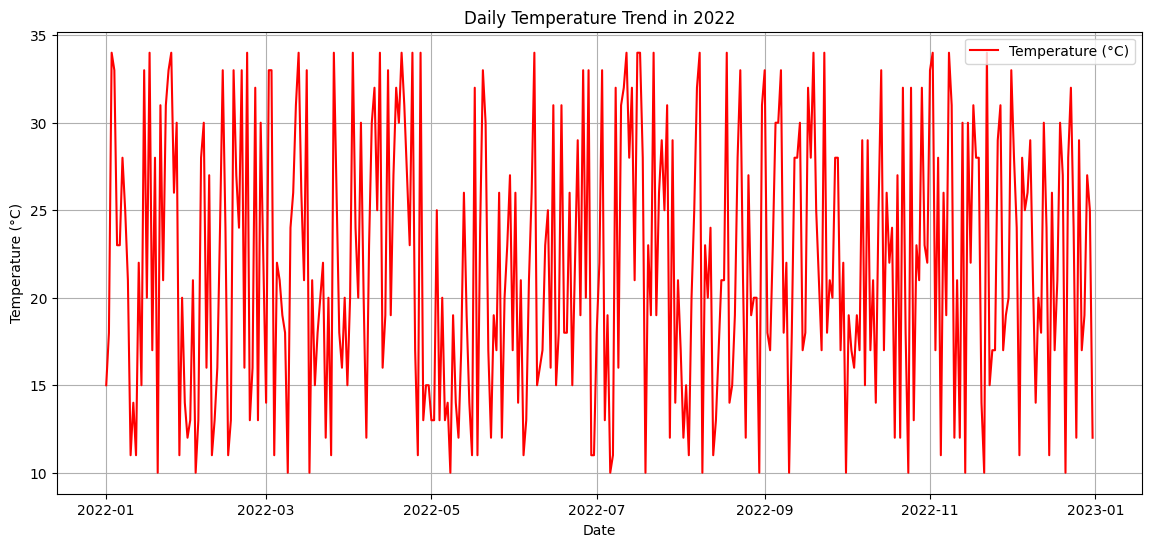

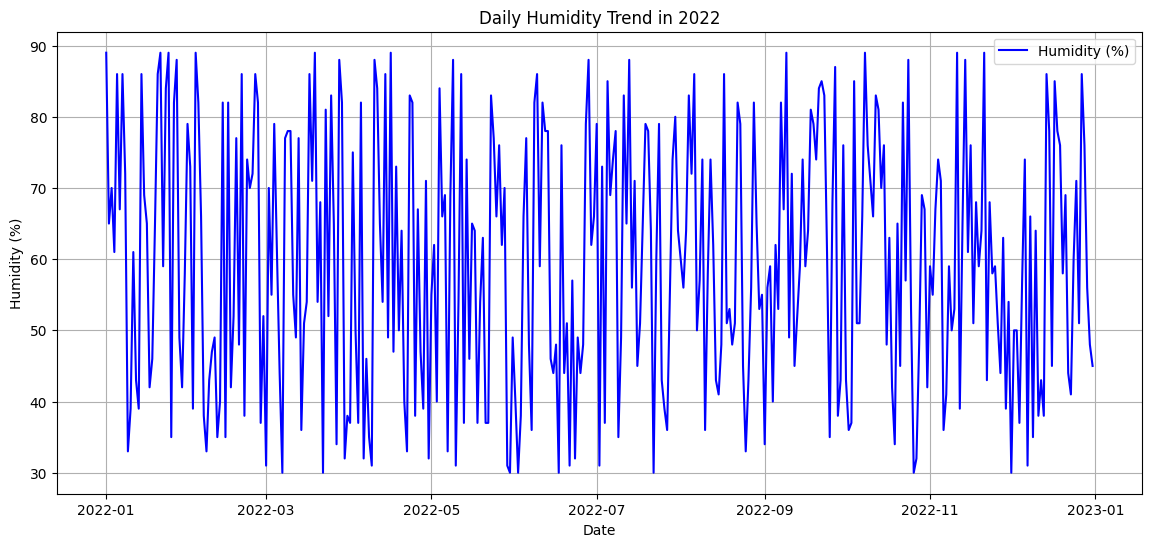

In [38]:
import matplotlib.pyplot as plt
# Plot the temperature trend
plt.figure(figsize=(14, 6))
plt.plot(weather_df['Date'], weather_df['Temperature'], label='Temperature (°C)', color='r')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Daily Temperature Trend in 2022')
plt.legend()
plt.grid(True)
plt.show()

# Plot the humidity trend
plt.figure(figsize=(14, 6))
plt.plot(weather_df['Date'], weather_df['Humidity'], label='Humidity (%)', color='b')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.title('Daily Humidity Trend in 2022')
plt.legend()
plt.grid(True)
plt.show()

3. Window Function Exercise:

Objective: Apply window functions to the time series data.

Instructions:

Use a rolling window of 7 days to calculate the moving average for both temperature and humidity.
[bonus] Plot the original data and the 7-day moving average on the same graph for comparison.

In [39]:
weather_df

,Date,Temperature,Humidity
0,2022-01-01,15,89
1,2022-01-02,18,65
2,2022-01-03,34,70
3,2022-01-04,33,61
4,2022-01-05,23,86
...,...,...,...
360,2022-12-27,17,86
361,2022-12-28,19,76
362,2022-12-29,27,56
363,2022-12-30,25,48


In [44]:
temp_rolling_mean = weather_df['Temperature'].rolling(window=7).mean()
humidity_rolling_mean = weather_df['Humidity'].rolling(window=7).mean()
humidity_rolling_mean

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
360    60.285714
361    61.285714
362    63.000000
363    64.000000
364    61.857143
Name: Humidity, Length: 365, dtype: float64

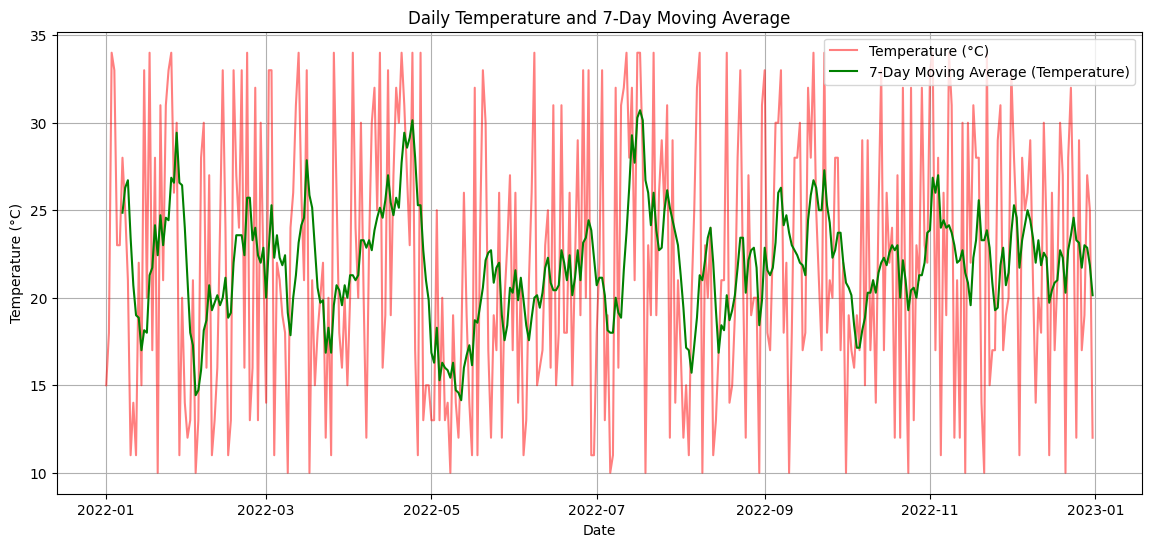

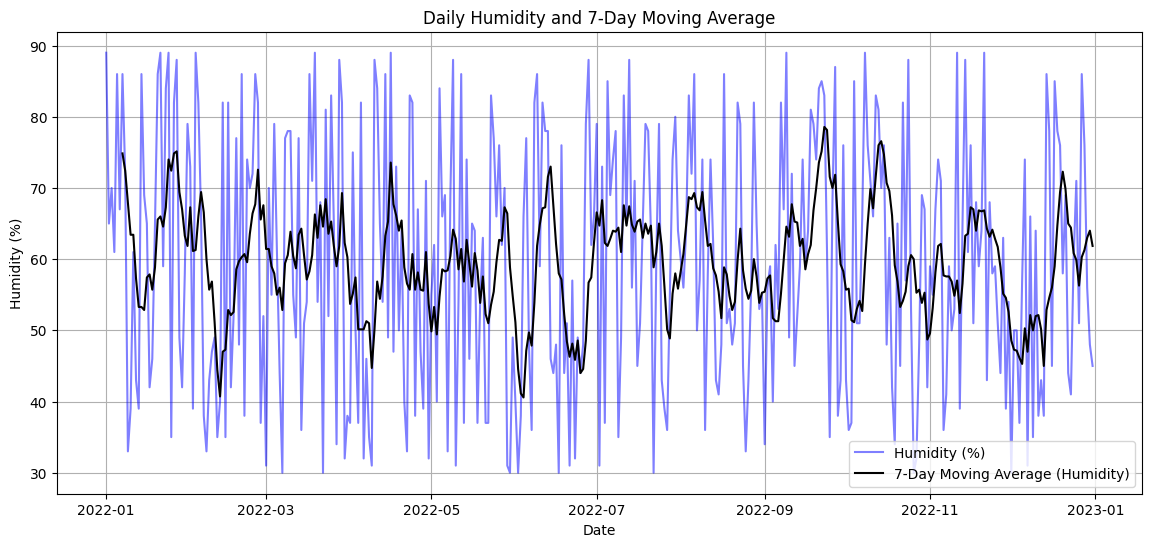

In [47]:
# Plot the temperature data and its 7-day moving average
plt.figure(figsize=(14, 6))
plt.plot(weather_df['Date'], weather_df['Temperature'], label='Temperature (°C)', color='r', alpha=0.5)
plt.plot(weather_df['Date'], temp_rolling_mean, label='7-Day Moving Average (Temperature)', color='green')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Daily Temperature and 7-Day Moving Average')
plt.legend()
plt.grid(True)
plt.show()

# Plot the humidity data and its 7-day moving average
plt.figure(figsize=(14, 6))
plt.plot(weather_df['Date'], weather_df['Humidity'], label='Humidity (%)', color='b', alpha=0.5)
plt.plot(weather_df['Date'], humidity_rolling_mean, label='7-Day Moving Average (Humidity)', color='black')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.title('Daily Humidity and 7-Day Moving Average')
plt.legend()
plt.grid(True)
plt.show()